In [6]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [7]:
def to_string(arr):
    import json
    s=json.dumps(arr.tolist())
    return s

def from_string(s):
    import json
    from numpy import array
    arr=array(json.loads(s))
    return arr

def take_picture(): # takes a random one from the list
    # replace this function with one that actually takes a picture
    from glob import glob
    from random import choice
    from pylab import imread
    
    fnames=glob('/Users/bblais/Desktop/ai373/images/board images/*.jpg')
    
    arr=imread(choice(fnames))
    return to_string(arr)

def take_picture():  # takes the newest one in the list
    # replace this function with one that actually takes a picture
    from glob import glob
    import os
    fnames=glob('/Users/bblais/Desktop/ai373/images/board images/*.jpg')

    newest = max(fnames, key=os.path.getctime)
    arr=imread(newest)
    return to_string(arr)



In [3]:
a=rand(3,4)
a

array([[0.41095721, 0.97931569, 0.37826429, 0.710744  ],
       [0.71426665, 0.79617576, 0.44149508, 0.25685973],
       [0.51665987, 0.68913709, 0.70887203, 0.48674692]])

In [4]:
from_string(to_string(a))

array([[0.41095721, 0.97931569, 0.37826429, 0.710744  ],
       [0.71426665, 0.79617576, 0.44149508, 0.25685973],
       [0.51665987, 0.68913709, 0.70887203, 0.48674692]])

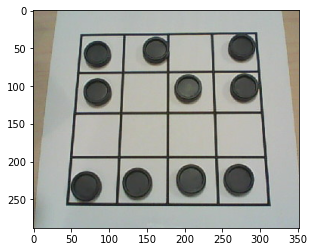

In [5]:
arr=from_string(take_picture())
imshow(arr)

In [5]:
from xmlrpc.server import SimpleXMLRPCServer
from xmlrpc.server import SimpleXMLRPCRequestHandler

# Restrict to a particular path.
class RequestHandler(SimpleXMLRPCRequestHandler):
    rpc_paths = ('/RPC2',)

# Create server
with SimpleXMLRPCServer(('localhost', 4001),
                        requestHandler=RequestHandler) as server:
    server.register_introspection_functions()

    server.register_function(take_picture)

    # Run the server's main loop
    server.serve_forever()

NameError: name 'take_picture' is not defined

In [1]:
from getpass import getpass
import paramiko

In [2]:
ssh_host='localhost'
ssh_user='bblais'
ssh_password=getpass('Password:')

Password: ····················


In [4]:
# establish SSH tunnel

ssh = paramiko.SSHClient()
ssh.load_system_host_keys()
ssh.connect(hostname=ssh_host, username=ssh_user, password=ssh_password)

transport = ssh_client.get_transport()
dest_addr = (remote_host, remote_port)
local_unique_port = 4000 # any unused local port
local_host = 'localhost'
local_addr = (local_host, local_unique_port)
